# Plotting Country Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import requests
import matplotlib
import matplotlib.pyplot as pp
import mplcursors
import ipywidgets as widgets
from ipywidgets import IntRangeSlider, SelectMultiple
from IPython.display import display


%matplotlib inline

In [19]:
#load country data

data = pd.read_csv("Big Data Challenge_ Data and Challenge Statements/Data/final_country_data_by_quarter_elec_mob_strin.csv")
data.columns

Index(['CountryName', 'Year', 'Month', 'Quarter', 'max_StIn', 'min_StIn',
       'max_StInDis', 'min_StInDis', 'ConfirmedCases', 'ConfirmedDeaths',
       'avg_residential_mobility_from_baseline',
       'avg_workplace_mobility_from_baseline', 'TWh', 'Percent_Month_2019',
       'Date', 'fake day', 'Date_Est', 'Deaths_by_100,000',
       'Cases_by_100,000'],
      dtype='object')

In [21]:
#rename the Deaths by 100,000 and Cases by 100,000 column because I was running into some trouble for some reason

data.columns = ['CountryName', 'Year', 'Month', 'Quarter', 'max_StIn', 'min_StIn',
       'max_StInDis', 'min_StInDis', 'ConfirmedCases', 'ConfirmedDeaths',
       'avg_residential_mobility_from_baseline',
       'avg_workplace_mobility_from_baseline', 'TWh', 'Percent_Month_2019',
       'Date', 'fake day', 'Date_Est', 'Deaths_by_100k',
       'Cases_by_100k']
data

,CountryName,Year,Month,Quarter,max_StIn,min_StIn,max_StInDis,min_StInDis,ConfirmedCases,ConfirmedDeaths,avg_residential_mobility_from_baseline,avg_workplace_mobility_from_baseline,TWh,Percent_Month_2019,Date,fake day,Date_Est,Deaths_by_100k,Cases_by_100k
0,Austria,2020,April,1,85.19,85.19,85.19,85.19,12640.0,243.0,21.250000,-55.625000,4.556000,86.847122,2020 April 4,4,2020-04-04,2.737411,142.390447
1,Austria,2020,April,2,85.19,81.48,85.19,81.48,14370.0,393.0,20.500000,-57.125000,4.556000,86.847122,2020 April 11,11,2020-04-11,4.427171,161.879013
2,Austria,2020,April,3,81.48,78.70,81.48,78.70,14924.0,494.0,16.714286,-46.142857,4.556000,86.847122,2020 April 18,18,2020-04-18,5.564943,168.119860
3,Austria,2020,April,4,78.70,78.70,78.70,78.70,15364.0,580.0,14.571429,-42.428571,4.556000,86.847122,2020 April 25,25,2020-04-25,6.533739,173.076490
4,Austria,2020,August,1,31.48,31.48,31.48,31.48,21819.0,720.0,0.750000,-27.500000,NaN,NaN,2020 August 4,4,2020-08-04,8.110848,245.792497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3592,United Kingdom,2019,August,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.742809,NaN,2019 August 25,25,2019-08-25,NaN,NaN
3593,United Kingdom,2019,September,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.870830,NaN,2019 September 25,25,2019-09-25,NaN,NaN
3594,United Kingdom,2019,October,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.767437,NaN,2019 October 25,25,2019-10-25,NaN,NaN
3595,United Kingdom,2019,November,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.566669,NaN,2019 November 25,25,2019-11-25,NaN,NaN


## Plotting by country and feature

This probably looks too clunky. Could modify the list in plot_all_countries function though to only include a handfull of countries that we find most interesting. 

In [22]:
#input country name and feature (e.g. max_StInDis)

def plotcountry(country, feature):
    df = data[data.CountryName == country].sort_values(by = ['Date_Est'], ascending = True)
    pp.plot(df['Date_Est'], df[feature], label=country)
    

In [23]:
def plot_all_countries(feature):
    #create list of all relevant countries
    Europe = ['Belgium', 'Bulgaria', 'Czechia', 'Denmark', 'Germany', 'Estonia', 'Ireland', 'Greece', 'Spain', 'France', 
              'Croatia', 'Italy', 'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Netherlands', 'Austria', 
              'Poland', 'Portugal', 'Romania','Slovenia', 'Slovak Republic', 'Finland', 'Sweden', 'United Kingdom']
    
    pp.figure(figsize=(12,2.5))
    
    for country in Europe:
        plotcountry(country, feature)
        
    pp.legend()
        

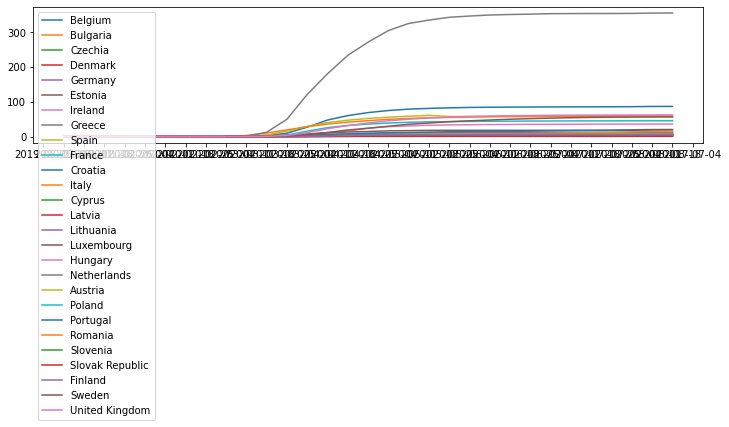

In [24]:
plot_all_countries('Deaths_by_100k')

In [14]:
data['Cases_by_100,000'].max()

3687.8822850548186

# Potential Plot for Final Presentation

The plot needs some visual improvements (add things like title, change axis label sizes, etc). The creation of the plot is defined in plot_2features, and then implemented in the cell below. Once we figure out a color scheme we can change it so that imputing feature1_color and feature2_color are no longer options and the color is automatically chosen in the two subplots.
It might also be nice to add some smoothing to make it visually look less clunky, but not absolutely necessary.

### it might be best to pre-set which features they can look at to avoid muddling the message/having it be too unclear. So country would be the only drop down option

In [29]:
def plot_2features(country, feature1, feature2, feature1_color = 'red', feature2_color = 'blue'):
    data2 = data[data.CountryName == country].sort_values(by = ['Date_Est'], ascending = True)
    df = data2.query('Date_Est> "2020-01-01"')
    df.set_index(['Date_Est'], inplace = True)
    
    ymax = {'max_StIn': 100, 'min_StIn': 100, 'max_StInDis': 100, 'min_StInDis': 100, 'Cases_by_100k':3700, 'Deaths_by_100k': 360, 
            'avg_residential_mobility_from_baseline': 100, 'avg_workplace_mobility_from_baseline': -100, 'Percent_Month_2019': 120}
    ymin = {'max_StIn': 0, 'min_StIn': 0, 'max_StInDis': 0, 'min_StInDis': 0, 'Cases_by_100k':0, 'Deaths_by_100k': 0, 
            'avg_residential_mobility_from_baseline': 0, 'avg_workplace_mobility_from_baseline': 0, 'Percent_Month_2019': 0}
    
    label = {'max_StInDis': 'Maximum Stringency Index During Given Week', 'min_StInDis': 'Minimum Stringency Index During Given Week', 
             'Cases_by_100k': 'Cumulative Confirmed Cases per 100,000', 'Deaths_by_100k': 'Cumulative Confirmed Deaths per 100,000', 
             'avg_residential_mobility_from_baseline': 'Residental Mobility Percent Change from Baseline', 
             'avg_workplace_mobility_from_baseline': 'Workplace Mobility Percent Change from Baseline', 'Percent_Month_2019': "Total monthly electricity usage as a percentage of the same month in 2019"}
    
    fig, ax1 = pp.subplots(figsize = (15, 10))

    if feature1 == 'avg_workplace_mobility_from_baseline':
        ax1.invert_yaxis()
    color = feature1_color # once we've decided on a color scheme put the final color choice for feature1 here
    ax1.set_xlabel('Date')
    ax1.set_ylabel(label[feature1], color=color)
    ax1.plot(df[feature1], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim([ymin[feature1],ymax[feature1]])
    fig.autofmt_xdate()

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    if feature2 == 'avg_workplace_mobility_from_baseline':
        ax2.invert_yaxis()

    color = feature2_color # once we've decided on a color scheme put the final color choice for feature2 here and 
                            # then remove feature1_color and feature2_color from the args listed in the definition of the function
    ax2.set_ylabel(label[feature2], color=color)  # we already handled the x-label with ax1
    ax2.plot(df[feature2], color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim([ymin[feature2],ymax[feature2]])

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    pp.show()
    


In [30]:
#plot_volumes('left_Whole_hippocampus')
# Add a slider

Europe = ['Belgium', 'Bulgaria', 'Czech Republic', 'Denmark', 'Germany', 'Estonia', 'Ireland', 'Greece', 'Spain', 'France', 
              'Croatia', 'Italy', 'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Netherlands', 'Austria', 
              'Poland', 'Portugal', 'Romania','Slovenia', 'Slovak Republic', 'Finland', 'Sweden', 'United Kingdom']
Features = [('Maximum Weekly Stringency Index', 'max_StInDis'), ('Minimum Weekly Stringency Index', 'min_StInDis'), ('Confirmed Cases per 100,000','Cases_by_100k'), 
            ('Confirmed Deaths per 100,000', 'Deaths_by_100k'),('Change in Residential Mobility', 'avg_residential_mobility_from_baseline'),('Change in Workplace Mobility','avg_workplace_mobility_from_baseline'),('Electricity Usage', 'Percent_Month_2019')]

country_select = widgets.Dropdown(options = Europe, description = 'Country')
feature1_select = widgets.Dropdown(options = Features, description = 'Feature 1')
feature2_select = widgets.Dropdown(options = Features, description = 'Feature 2')

# Hook it up to interact
from ipywidgets import interact
interact(
    plot_2features,
    country = country_select,
    feature1 = feature1_select,
    feature2 = feature2_select
)

interactive(children=(Dropdown(description='Country', options=('Belgium', 'Bulgaria', 'Czech Republic', 'Denma…

<function __main__.plot_2features(country, feature1, feature2, feature1_color='red', feature2_color='blue')>

# Pretty Plot

In [80]:
df1 = data.sort_values(by = ['Date_Est'], ascending = True)
df2 = df1[(df1['Date_Est'] > "2020-02-17") & (df1['Date_Est'] < "2020-07-01")]
df3 = df2[['Date_Est']].drop_duplicates()
date_list = df3.Date_Est.tolist()
date_list


date_slider = widgets.SelectionSlider(
    options=date_list,
    description='Date',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True
)

In [83]:
def plotyear(date):
    df = data[data.Date_Est == date].sort_values('TWh',ascending = False)
    area = 700
    color = (-1) * df.avg_workplace_mobility_from_baseline
    
    xs = df.max_StInDis
    ys = df.Percent_Month_2019
    ls = df.CountryName
    
    df.plot.scatter(['max_StInDis'], ['Percent_Month_2019'], 
                      s=area,c = color,
                      colormap = matplotlib.cm.get_cmap('Purples_r'), vmin = 55, vmax = 100,
                     linewidths=1,
                      edgecolors= 'black',
                      sharex=False,
                     figsize = (15,8),
                   ylim = (50, 120), xlim = (0, 100))
    
    for x,y,label in zip(xs,ys,ls):

        pp.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,20), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
  
#     for level in [4,16,64]:
#         pp.axvline(level, linestyle = ':', color = 'k')



    pp.show()

In [84]:
from ipywidgets import interact
interact(
    plotyear,
    date = date_slider
)

interactive(children=(SelectionSlider(description='Date', index=3, options=('2020-02-18', '2020-02-25', '2020-…

<function __main__.plotyear(date)>